### Import Data
* use the files path: **C:\Users\namb2\OneDrive\Documents\GitHub\BAIS3500_final_project_repo\data\final_data\white_wine_transformed.csv**
---

In [3]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [10]:
# import csv files
white_wine_df=pd.read_csv(r'C:\Users\namb2\OneDrive\Documents\GitHub\BAIS3500_final_project_repo\data\final_data\white_wine_transformed.csv',sep=',',encoding='utf-8')

# display
white_wine_df.head()

wine_ID  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0        0            7.0              0.27         0.36            20.7   
1        1            6.3              0.30         0.34             1.6   
2        2            8.1              0.28         0.40             6.9   
3        3            7.2              0.23         0.32             8.5   
4        4            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    ph  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality quality_transformed_3 quality_transformed_2  
0       0.45      8.8        6        medium quality          high quality  
1       0.49      9.5        6        medium quality          high quality  
2       0.44     10.1        6        medium quality          high quality  
3       0.40      9.9        6        medium quality          high quality  
4       0.40      9.9        6        medium quality          high quality

---
# EDA

---
## Functions for Plots

In [6]:
# function for distribution of quanitative features
def distribution(x,bins):
    fig,ax= plt.subplots(1,2,figsize=(14, 6),gridspec_kw={'width_ratios':[2,2]})
    sns.histplot(data=white_wine_df,x=x,color='lightblue',bins=bins,ax=ax[0])
    ax[0].set_xlabel('')
    sns.boxplot(data=white_wine_df,x=x,color='lightblue',ax=ax[1],orient='h')
    ax[1].set_xlabel('')
    plt.suptitle(f'Distribution of {x}')
    fig.text(0.5,0.04,x,ha='center',va='center')
    plt.show()

In [7]:
def boxplot(x,y): 
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(data=white_wine_df,y=y,x=x) 
    plt.title(f'{y} by quality') 
    plt.xlabel('quality') 
    plt.ylabel(y) 
    plt.show()

In [8]:
def boxplot_normal(x,x_label,title,sub):

    # normalize x values
    x_values=white_wine_df[x]
    
    q1_x, q3_x = np.percentile(x_values, [25, 75])
    iqr_x = q3_x - q1_x
    lower_x = q1_x - (1.5 * iqr_x)
    upper_x = q3_x + (1.5 * iqr_x)

    q1_x, q3_x = np.percentile(x_values, [25, 75])

    lower_mask_x = (white_wine_df[x] > lower_x)
    upper_mask_x = (white_wine_df[x] < upper_x)

    cleaned_df=white_wine_df[lower_mask_x & upper_mask_x]
    
    sns.boxplot(data=cleaned_df,x=x,y='quality_transformed',hue='quality_transformed')
    plt.xlabel(x_label)
    plt.ylabel('')
    plt.title(sub,fontsize=8)
    plt.suptitle(title,fontsize=12)
    plt.show()

def scatter_normal(x,y,x_label,y_label,title,sub):

    # normalize x values
    x_values=white_wine_df[x]
    
    q1_x, q3_x = np.percentile(x_values, [25, 75])
    iqr_x = q3_x - q1_x
    lower_x = q1_x - (1.5 * iqr_x)
    upper_x = q3_x + (1.5 * iqr_x)

    q1_x, q3_x = np.percentile(x_values, [25, 75])

    # normalize y
    y_values=white_wine_df[y]
    
    q1_y, q3_y = np.percentile(y_values, [25, 75])
    iqr_y = q3_y - q1_y
    lower_y = q1_y - (1.5 * iqr_y)
    upper_y = q3_y + (1.5 * iqr_y)

    q1_y, q3_y = np.percentile(y_values, [25, 75])
    

    # mask for x
    lower_mask_x = (white_wine_df[x] > lower_x)
    upper_mask_x = (white_wine_df[x] < upper_x)
    
    # mask for y
    lower_mask_y = (white_wine_df[y] > lower_y)
    upper_mask_y = (white_wine_df[y] < upper_y)

    cleaned_df=white_wine_df[lower_mask_x & upper_mask_x & lower_mask_y & upper_mask_y]

    plt.figure(figsize=(8,6))
    scatter=sns.scatterplot(data=cleaned_df,x=x,y=y,hue='quality_transformed',alpha=0.4)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    legend=scatter.legend_
    legend.set_title('Quality Rating')
    plt.title(sub,fontsize=10)
    plt.suptitle(title,fontsize=12)
    plt.show()

def scatter_normal_1(x,y,x_label,y_label,title,sub):

    # normalize x values
    x_values=white_wine_df[x]
    
    q1_x, q3_x = np.percentile(x_values, [25, 75])
    iqr_x = q3_x - q1_x
    lower_x = q1_x - (1.5 * iqr_x)
    upper_x = q3_x + (1.5 * iqr_x)

    q1_x, q3_x = np.percentile(x_values, [25, 75])

    # normalize y
    y_values=white_wine_df[y]
    
    q1_y, q3_y = np.percentile(y_values, [25, 75])
    iqr_y = q3_y - q1_y
    lower_y = q1_y - (1.5 * iqr_y)
    upper_y = q3_y + (1.5 * iqr_y)

    q1_y, q3_y = np.percentile(y_values, [25, 75])
    

    # mask for x
    lower_mask_x = (white_wine_df[x] > lower_x)
    upper_mask_x = (white_wine_df[x] < upper_x)
    
    # mask for y
    lower_mask_y = (white_wine_df[y] > lower_y)
    upper_mask_y = (white_wine_df[y] < upper_y)

    cleaned_df=white_wine_df[lower_mask_x & upper_mask_x & lower_mask_y & upper_mask_y]

    plt.figure(figsize=(8,6))
    scatter=sns.scatterplot(data=cleaned_df,x=x,y=y,alpha=0.4)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(sub,fontsize=10)
    plt.suptitle(title,fontsize=12)
    plt.show()
    
def kdeplot_normal(x,y,x_label,y_label,title,sub):
    
    # normalize x values
    x_values=white_wine_df[x]
    
    q1_x, q3_x = np.percentile(x_values, [25, 75])
    iqr_x = q3_x - q1_x
    lower_x = q1_x - (1.5 * iqr_x)
    upper_x = q3_x + (1.5 * iqr_x)

    q1_x, q3_x = np.percentile(x_values, [25, 75])

    # normalize y
    y_values=white_wine_df[y]
    
    q1_y, q3_y = np.percentile(y_values, [25, 75])
    iqr_y = q3_y - q1_y
    lower_y = q1_y - (1.5 * iqr_y)
    upper_y = q3_y + (1.5 * iqr_y)

    q1_y, q3_y = np.percentile(y_values, [25, 75])
    

    # mask for x
    lower_mask_x = (white_wine_df[x] > lower_x)
    upper_mask_x = (white_wine_df[x] < upper_x)
    
    # mask for y
    lower_mask_y = (white_wine_df[y] > lower_y)
    upper_mask_y = (white_wine_df[y] < upper_y)

    cleaned_df=white_wine_df[lower_mask_x & upper_mask_x & lower_mask_y & upper_mask_y]

    plt.figure(figsize=(6,6))
    kdeplot=sns.kdeplot(data=cleaned_df,x=x,y=y,hue='quality_transformed',fill=True,alpha=0.4)
    legend=kdeplot.legend_
    legend.set_title('Quality Rating')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(sub,fontsize=8)
    plt.suptitle(title,fontsize=12)
    plt.show()

# target variable
def histplot(x,x_label,n):
    plt.figure(figsize=(6,6))
    histplot=sns.histplot(data=white_wine_df,x=x,multiple='dodge',hue='quality_transformed',bins=n)
    legend=histplot.legend_
    legend.set_title('Quality Rating')
    plt.xlabel(x_label)
    plt.title(f'{x_label} Distribution by Quality Rating')
    plt.show()

def kdeplot(x,x_label):
    plt.figure(figsize=(6,6))
    kdeplot=sns.kdeplot(data=white_wine_df,x=x,hue='quality_transformed_2',fill=True,alpha=0.5)
    legend=kdeplot.legend_
    legend.set_title('Quality Rating')
    plt.xlabel(x_label)
    plt.title(f'{x_label} Distribution by Quality Rating')
    plt.show()

---
## Target Class Distribution

In [10]:
# determine percentage values for each quality rating
high_quality_counts=white_wine_df[white_wine_df['quality_transformed']=='high quality']['quality_transformed'].shape[0]

total_quality_counts=white_wine_df['quality_transformed'].shape[0]

high_quality_perc= round(high_quality_counts/total_quality_counts*100,2)

high_quality_perc

66.52

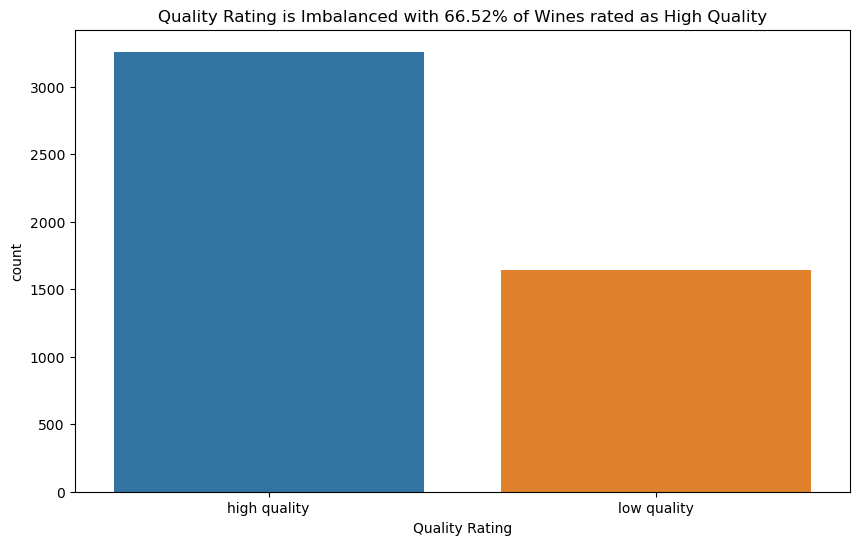

In [11]:
# target variable
plt.figure(figsize=(10,6))
sns.countplot(data=white_wine_df,x='quality_transformed',hue='quality_transformed')
plt.xlabel('Quality Rating')
plt.title(f'Quality Rating is Imbalanced with {high_quality_perc}% of Wines rated as High Quality',fontsize=12)
plt.show()

---
## Correlation Heat Maps

In [13]:
correlation_df=white_wine_df[['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']].corr()

In [14]:
correlation_df

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.022697     0.289181   
volatile_acidity          -0.022697          1.000000    -0.149472   
citric_acid                0.289181         -0.149472     1.000000   
residual_sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free_sulfur_dioxide       -0.049396         -0.097012     0.094077   
total_sulfur_dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
ph                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.089021   0.023086            -0.049396   
volatile_acidity            0.064286   0.070512            -0.097012   
citric_acid                 0.094212   0.114364             0.094077   
residual_sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free_sulfur_dioxide         0.299098   0.101392             1.000000   
total_sulfur_dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
ph                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   

                      total_sulfur_dioxide   density        ph  sulphates  \
fixed_acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile_acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric_acid                       0.121131  0.149503 -0.163748   0.062331   
residual_sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free_sulfur_dioxide               0.615501  0.294210 -0.000618   0.059217   
total_sulfur_dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
ph                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   

                       alcohol  
fixed_acidity        -0.120881  
volatile_acidity      0.067718  
citric_acid          -0.075729  
residual_sugar       -0.450631  
chlorides            -0.360189  
free_sulfur_dioxide  -0.250104  
total_sulfur_dioxide -0.448892  
density              -0.780138  
ph                    0.121432  
sulphates            -0.017433  
alcohol               1.000000

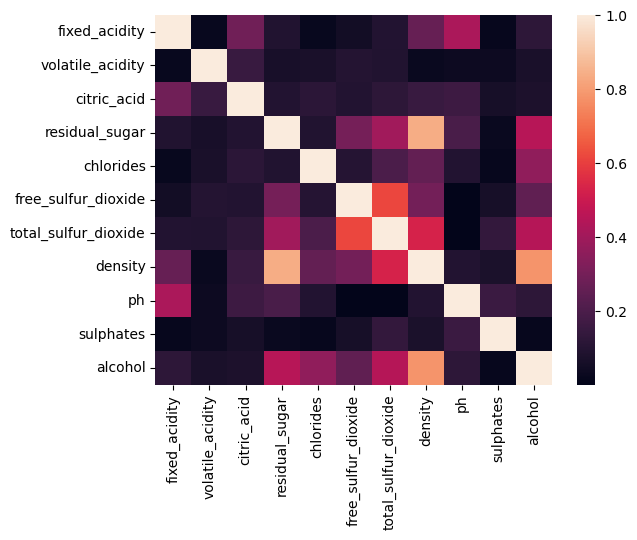

In [15]:
sns.heatmap(abs(correlation_df))

plt.show()

**items with correlation**

- density and alcohol
- density and residual sugar
- total sulfur dioxide and free sulfur dioxide

**plots with correlation**

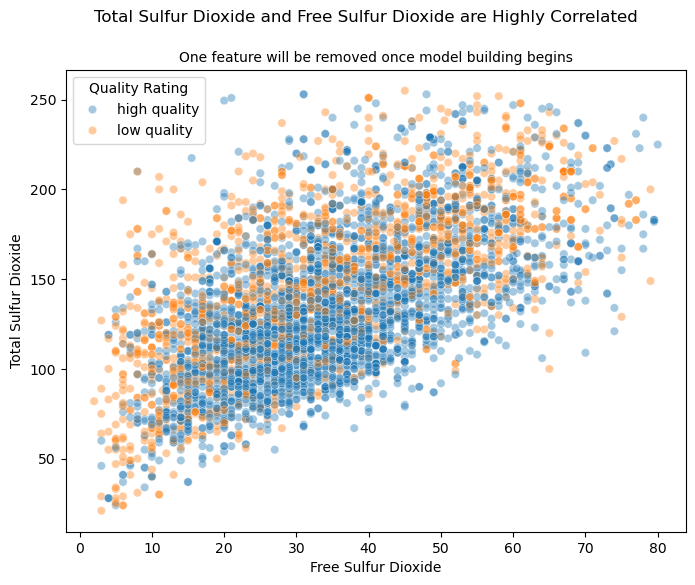

In [18]:
title='Total Sulfur Dioxide and Free Sulfur Dioxide are Highly Correlated'
subtitle='One feature will be removed once model building begins'
scatter_normal('free_sulfur_dioxide','total_sulfur_dioxide','Free Sulfur Dioxide','Total Sulfur Dioxide',title,subtitle)


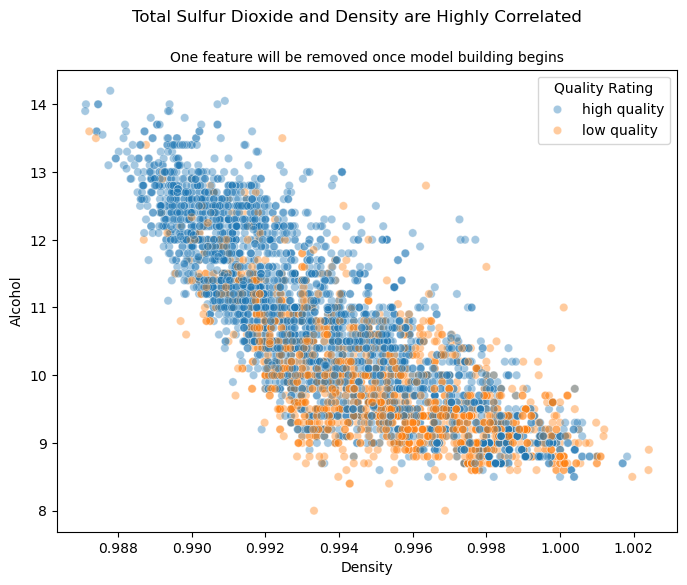

In [19]:
title='Total Sulfur Dioxide and Density are Highly Correlated'
subtitle='One feature will be removed once model building begins'
scatter_normal('density','alcohol','Density','Alcohol',title,subtitle)


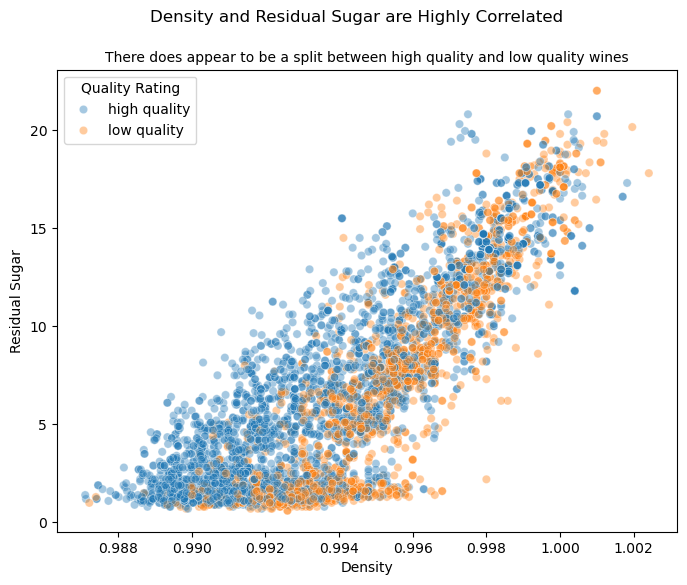

In [20]:
title='Density and Residual Sugar are Highly Correlated'
subtitle='There does appear to be a split between high quality and low quality wines'
scatter_normal('density','residual_sugar','Density','Residual Sugar',title,subtitle)


---
## Pick Most Valuable Box Plots

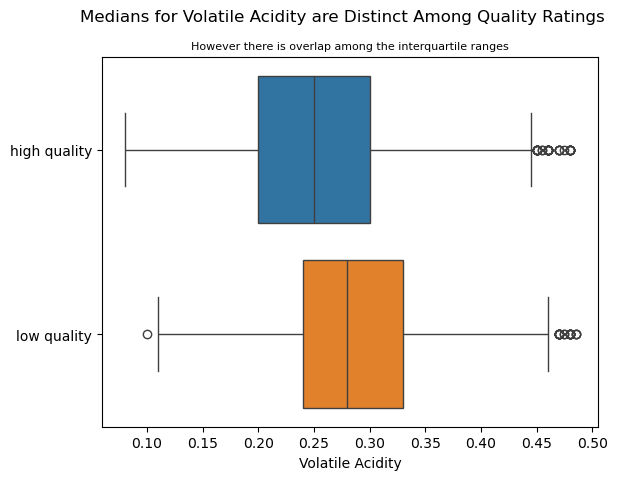

In [22]:
boxplot_normal('volatile_acidity','Volatile Acidity','Medians for Volatile Acidity are Distinct Among Quality Ratings','However there is overlap among the interquartile ranges')

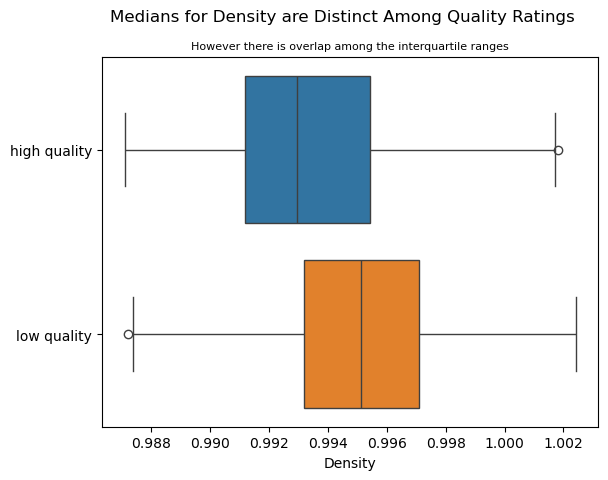

In [23]:
value='density'

boxplot_normal('density','Density','Medians for Density are Distinct Among Quality Ratings','However there is overlap among the interquartile ranges')

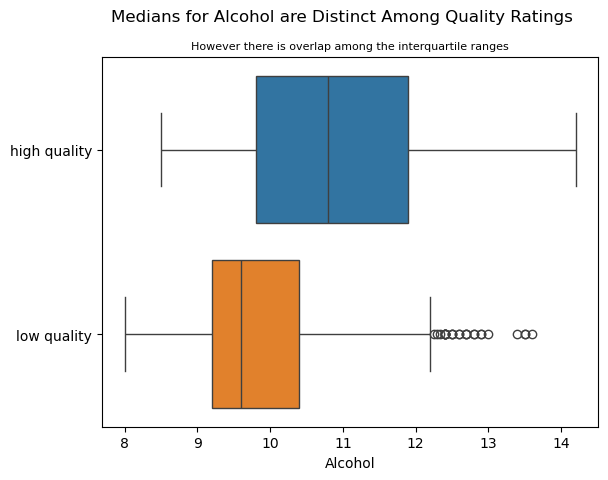

In [24]:
boxplot_normal('alcohol','Alcohol','Medians for Alcohol are Distinct Among Quality Ratings','However there is overlap among the interquartile ranges')

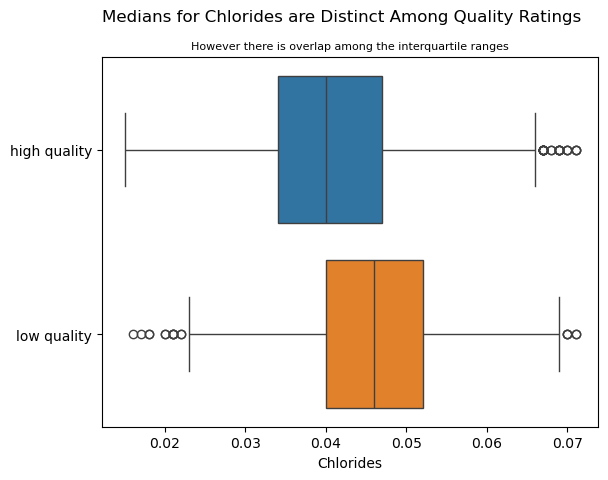

In [25]:
boxplot_normal('chlorides','Chlorides','Medians for Chlorides are Distinct Among Quality Ratings','However there is overlap among the interquartile ranges')

---
# Final Box Plot

In [27]:
def boxplot_ax(x,x_label,ax):

    # normalize x values
    x_values=white_wine_df[x]
    
    q1_x, q3_x = np.percentile(x_values, [25, 75])
    iqr_x = q3_x - q1_x
    lower_x = q1_x - (1.5 * iqr_x)
    upper_x = q3_x + (1.5 * iqr_x)

    q1_x, q3_x = np.percentile(x_values, [25, 75])

    lower_mask_x = (white_wine_df[x] > lower_x)
    upper_mask_x = (white_wine_df[x] < upper_x)

    cleaned_df=white_wine_df[lower_mask_x & upper_mask_x]
    
    sns.boxplot(data=cleaned_df,x=x,y='quality_transformed',hue='quality_transformed',ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel('')


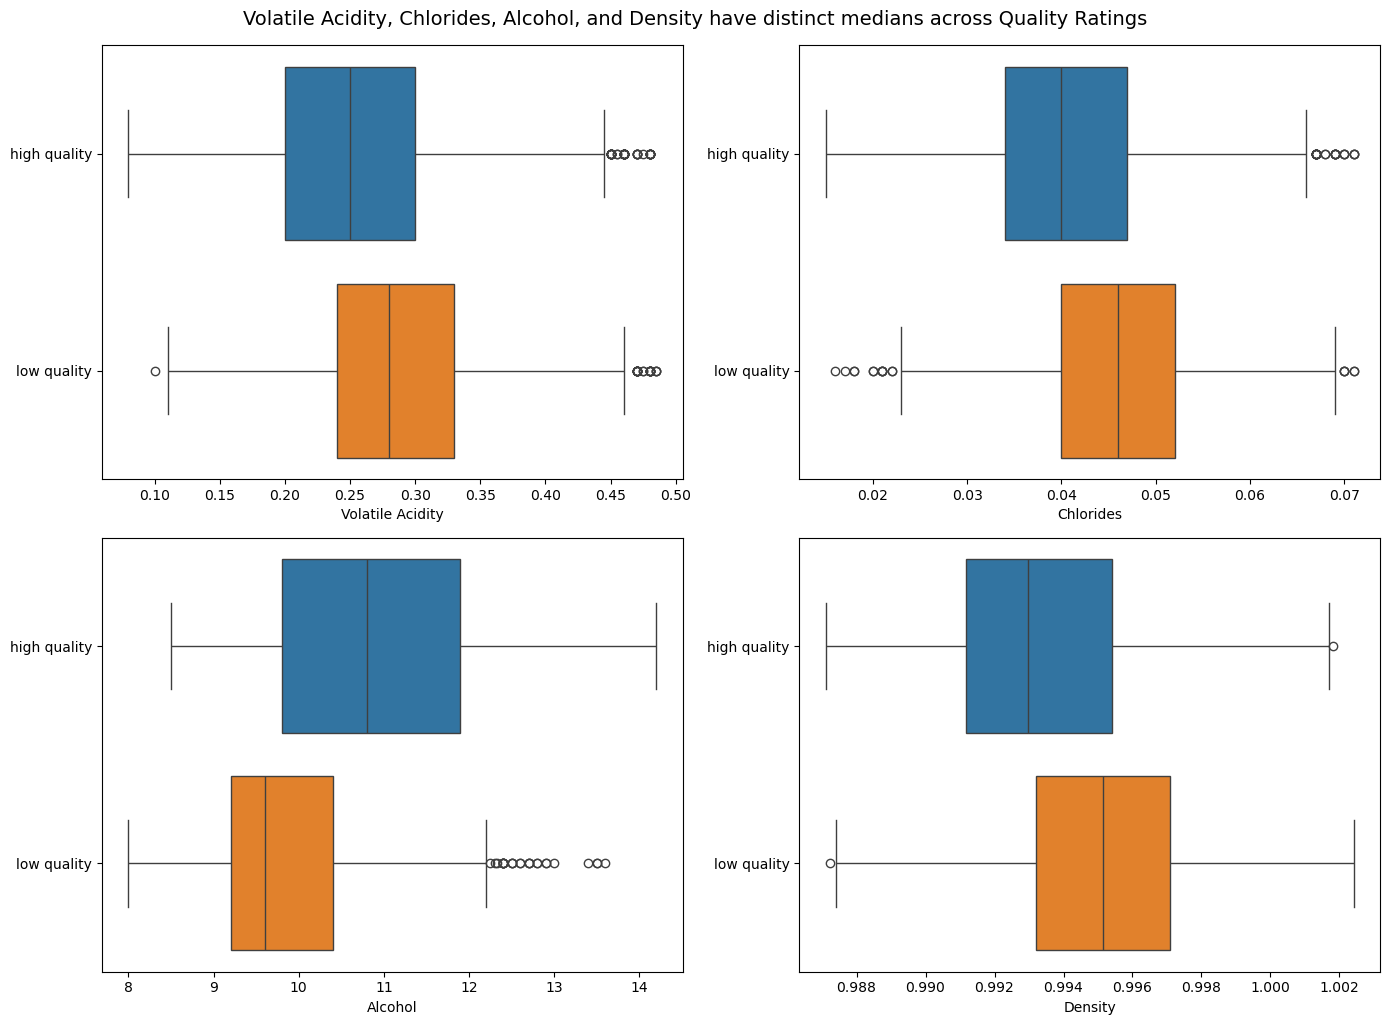

In [28]:
# figure
fig, axs=plt.subplots(2,2, figsize=(14,10))

# subplots
boxplot_ax('volatile_acidity','Volatile Acidity',axs[0,0])
boxplot_ax('chlorides','Chlorides',axs[0,1])
boxplot_ax('alcohol','Alcohol',axs[1,0])
boxplot_ax('density','Density',axs[1,1])

plt.tight_layout()
plt.suptitle('Volatile Acidity, Chlorides, Alcohol, and Density have distinct medians across Quality Ratings',y=1.02,fontsize=14)
plt.show()

---
## Pick Most Valuable Scatter Plots

- density vs residual sugar
- free sulfur dioxide and total

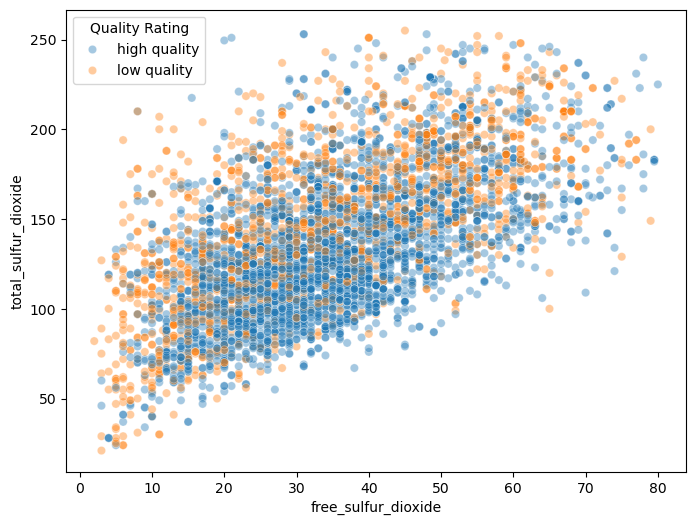

In [30]:
scatter_normal('free_sulfur_dioxide','total_sulfur_dioxide','free_sulfur_dioxide','total_sulfur_dioxide',None,None)

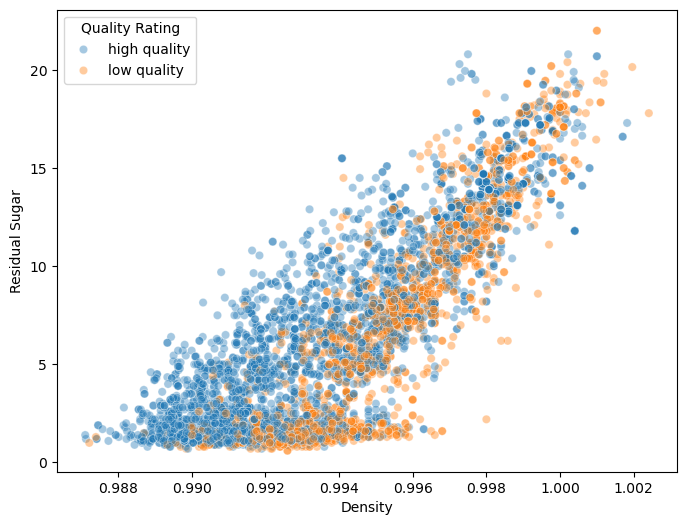

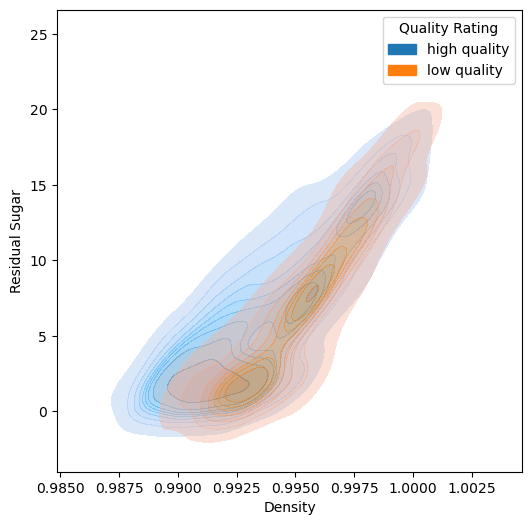

In [31]:
# scatter
scatter_normal('density','residual_sugar','Density','Residual Sugar',None,None)
kdeplot_normal('density','residual_sugar','Density','Residual Sugar',None,None)

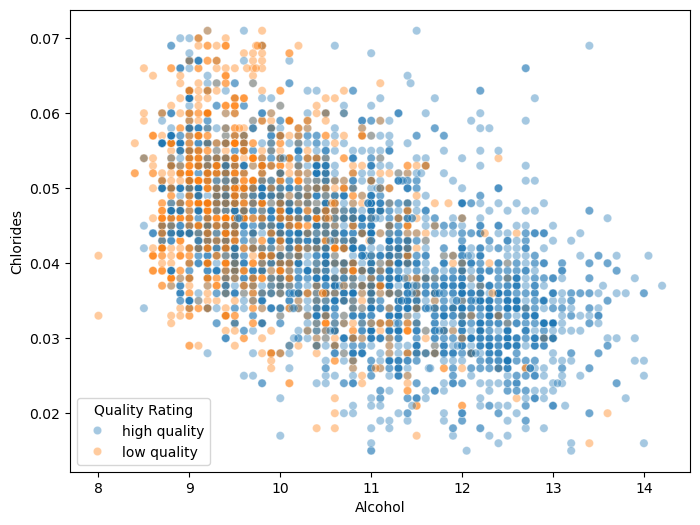

In [35]:
scatter_normal('alcohol','chlorides','Alcohol','Chlorides',None,None)

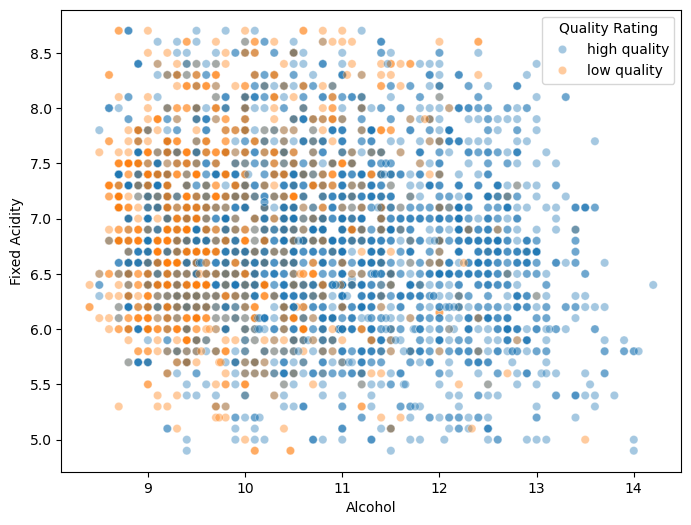

In [36]:
scatter_normal('alcohol','fixed_acidity','Alcohol','Fixed Acidity',None,None)

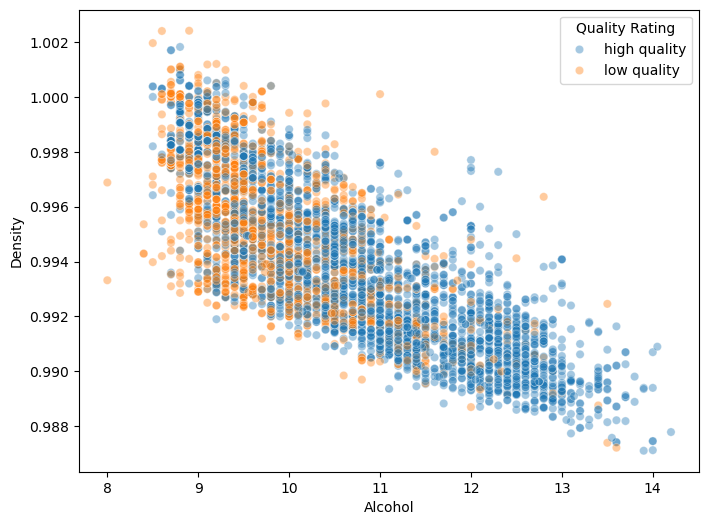

In [37]:
scatter_normal('alcohol','density','Alcohol','Density',None,None)

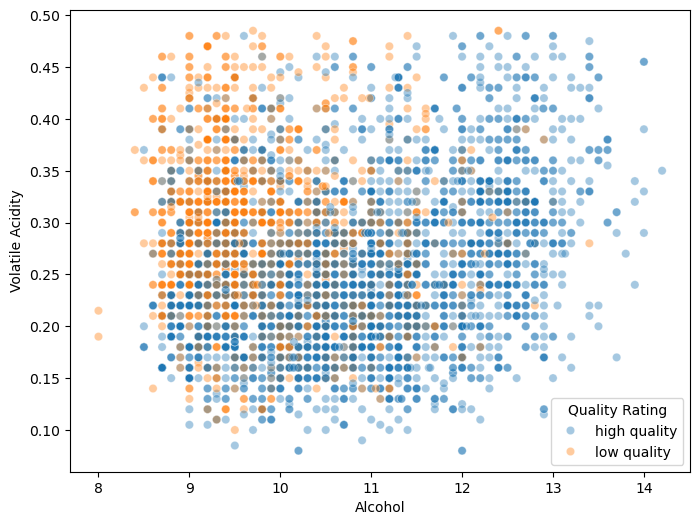

In [38]:
scatter_normal('alcohol','volatile_acidity','Alcohol','Volatile Acidity',None,None)

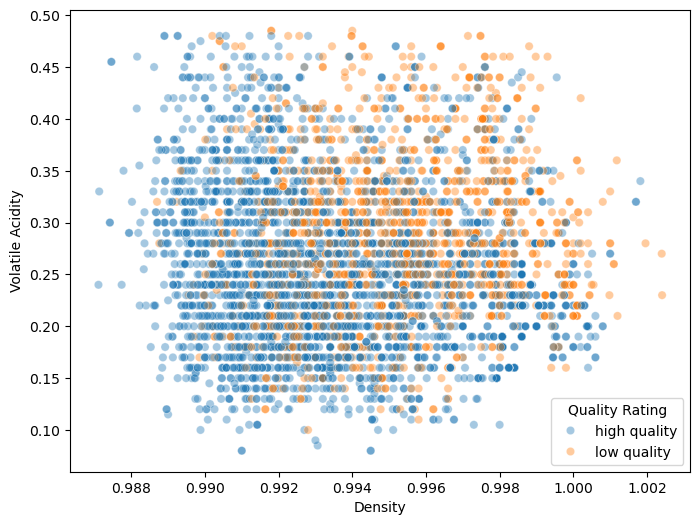

In [40]:
scatter_normal('density','volatile_acidity','Density','Volatile Acidity',None,None)

---
# Final Scatter Plot

In [45]:
def kdeplot_ax(x,y,x_label,y_label,ax):

    # normalize x values
    x_values=white_wine_df[x]
    
    q1_x, q3_x = np.percentile(x_values, [25, 75])
    iqr_x = q3_x - q1_x
    lower_x = q1_x - (1.5 * iqr_x)
    upper_x = q3_x + (1.5 * iqr_x)

    q1_x, q3_x = np.percentile(x_values, [25, 75])

    # normalize y
    y_values=white_wine_df[y]
    
    q1_y, q3_y = np.percentile(y_values, [25, 75])
    iqr_y = q3_y - q1_y
    lower_y = q1_y - (1.5 * iqr_y)
    upper_y = q3_y + (1.5 * iqr_y)

    q1_y, q3_y = np.percentile(y_values, [25, 75])
    

    # mask for x
    lower_mask_x = (white_wine_df[x] > lower_x)
    upper_mask_x = (white_wine_df[x] < upper_x)
    
    # mask for y
    lower_mask_y = (white_wine_df[y] > lower_y)
    upper_mask_y = (white_wine_df[y] < upper_y)

    cleaned_df=white_wine_df[lower_mask_x & upper_mask_x & lower_mask_y & upper_mask_y]

    kdeplot=sns.kdeplot(data=cleaned_df,x=x,y=y,hue='quality_transformed',fill=True,alpha=0.4,ax=ax,legend=False)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

In [55]:
palette=sns.color_palette("deep", 10)

display(palette)

blue=palette[0]
orange=palette[1]

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

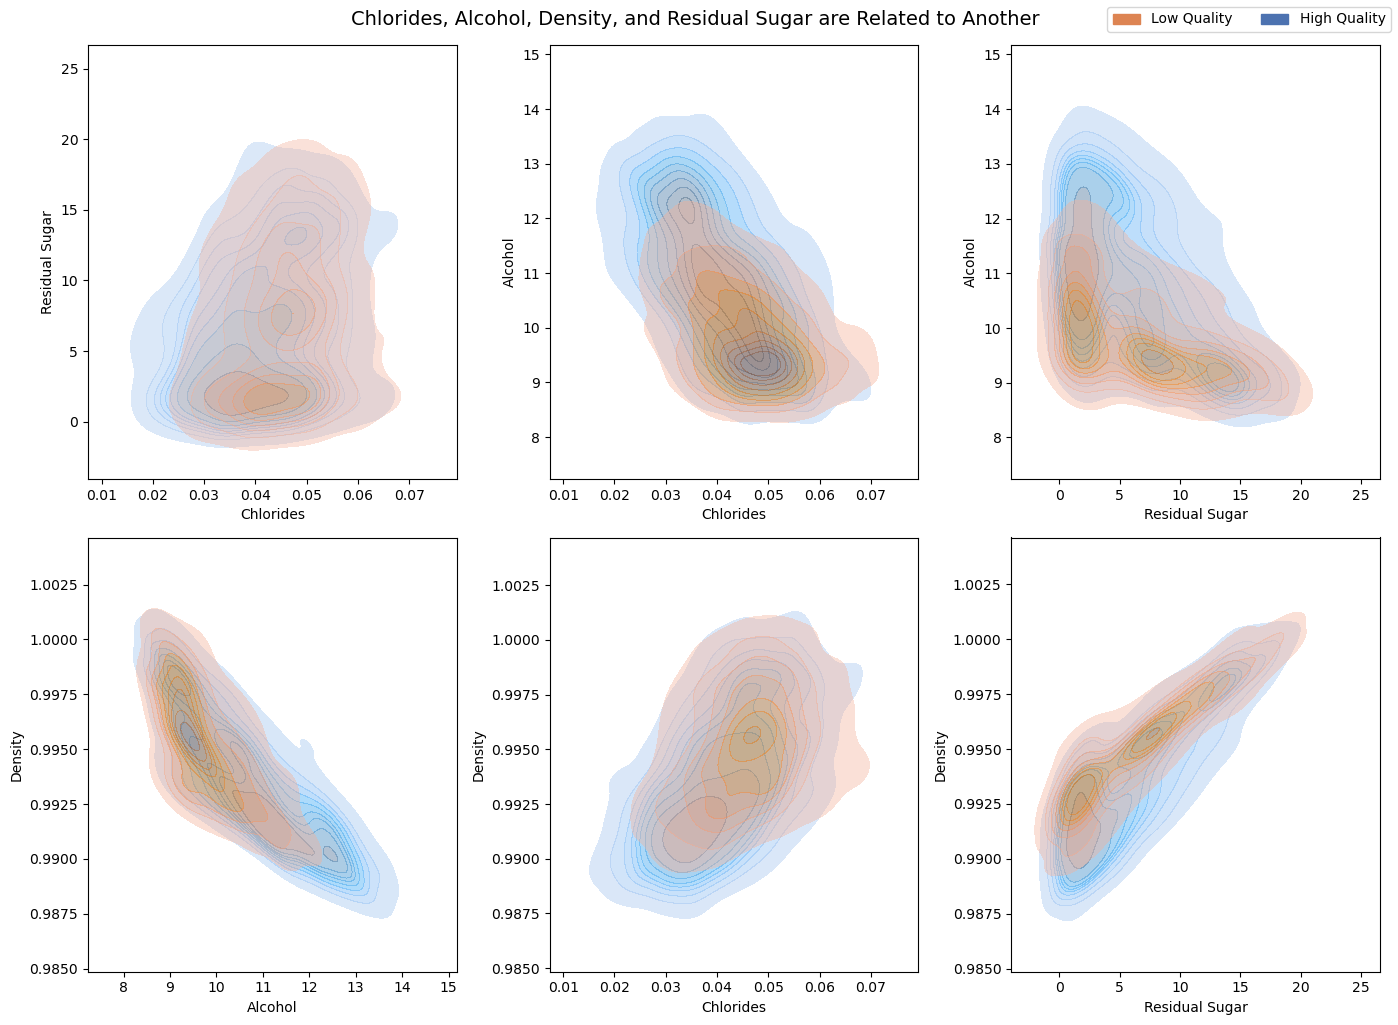

In [81]:
# figure
fig, axs=plt.subplots(2,3, figsize=(14,10))

# subplots
#x,y,x_label,y_label,ax
kdeplot_ax('residual_sugar','density','Residual Sugar','Density',axs[1,2])
kdeplot_ax('chlorides','alcohol','Chlorides','Alcohol',axs[0,1])
kdeplot_ax('alcohol','density','Alcohol','Density',axs[1,0])
kdeplot_ax('residual_sugar','alcohol','Residual Sugar','Alcohol',axs[0,2])
kdeplot_ax('chlorides','density','Chlorides','Density',axs[1,1])
kdeplot_ax('chlorides','residual_sugar','Chlorides','Residual Sugar',axs[0,0])



plt.tight_layout()

# Add a main title without color 
plt.suptitle('Chlorides, Alcohol, Density, and Residual Sugar are Related to Another', y=1.02, fontsize=14)

# Create custom legend handles 
low_patch = mpatches.Patch(color=orange, label='Low Quality') 
high_patch = mpatches.Patch(color=blue, label='High Quality') 

fig.legend(handles=[low_patch, high_patch], loc='upper right', ncol=2, fontsize=10)
#legend.set_title('Quality Rating')
           
plt.show()

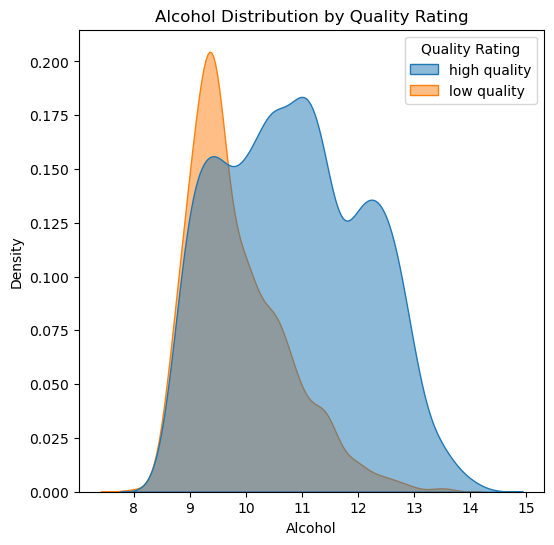

In [234]:
kdeplot('alcohol','Alcohol')

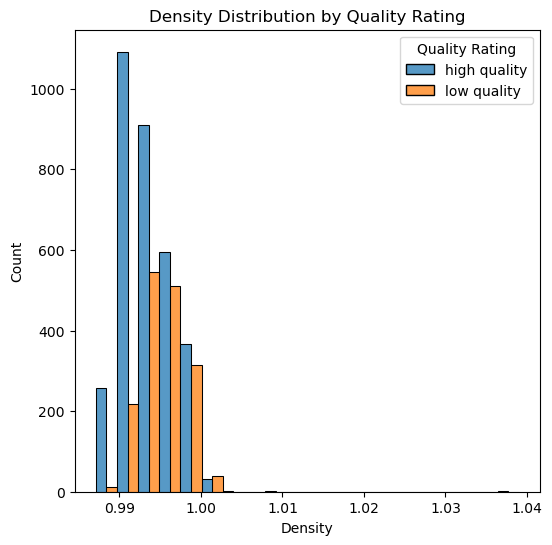

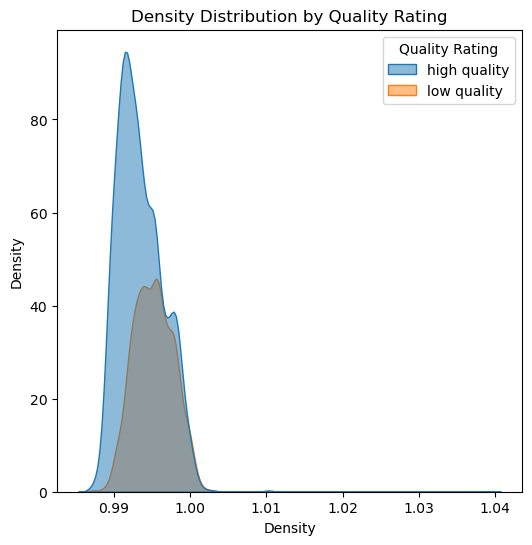

In [372]:
histplot('density','Density',20)
kdeplot('density','Density')

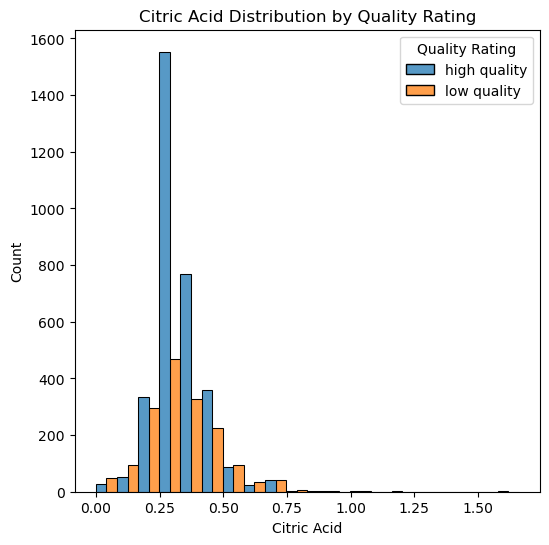

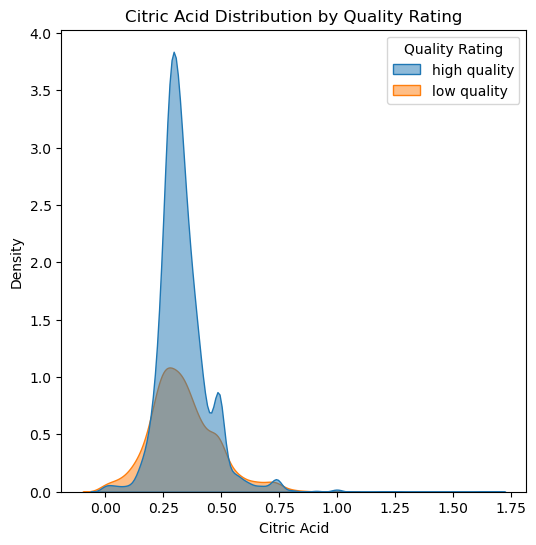

In [374]:
histplot('citric_acid','Citric Acid',20)
kdeplot('citric_acid','Citric Acid')

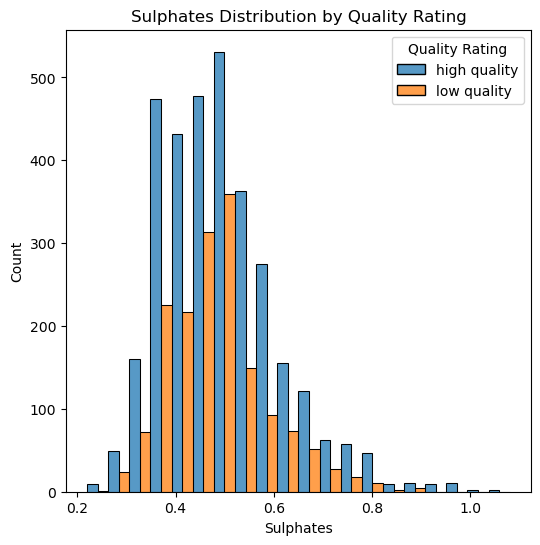

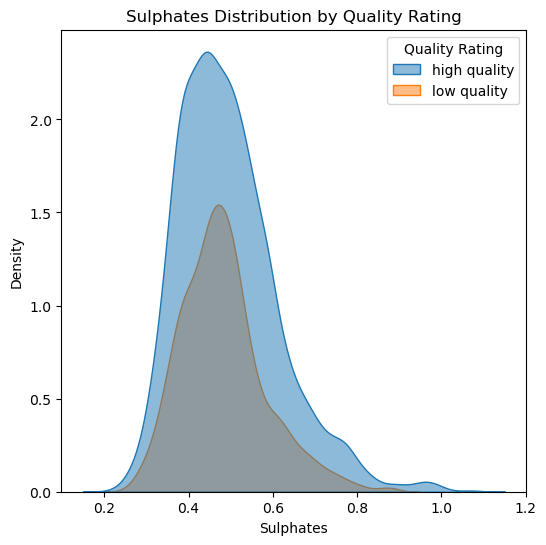

In [376]:
histplot('sulphates','Sulphates',20)
kdeplot('sulphates','Sulphates')

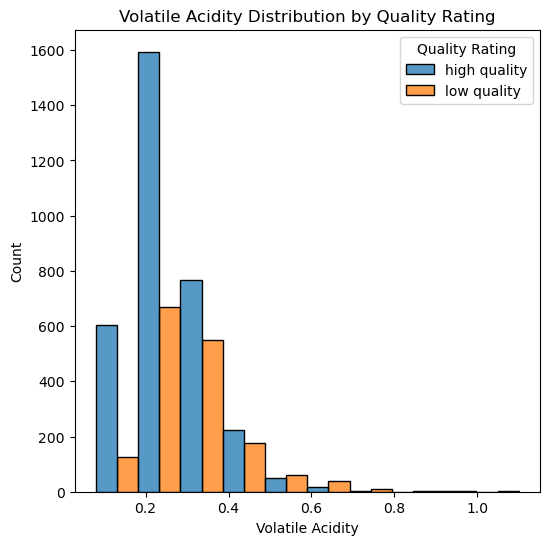

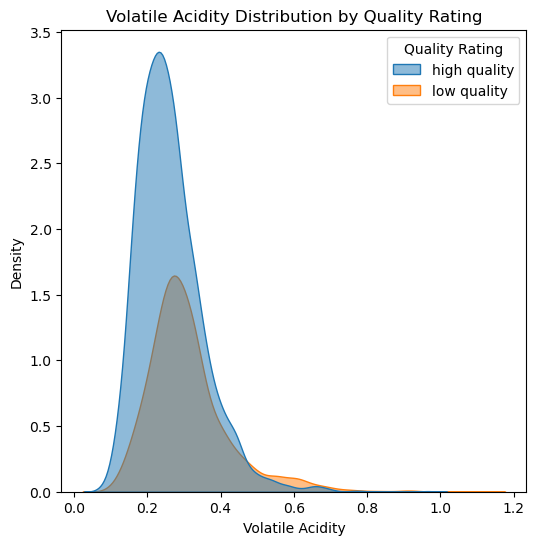

In [380]:
histplot('volatile_acidity','Volatile Acidity',10)
kdeplot('volatile_acidity','Volatile Acidity')

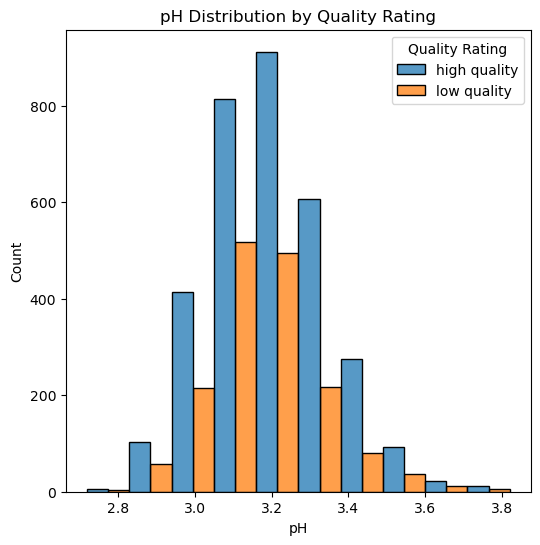

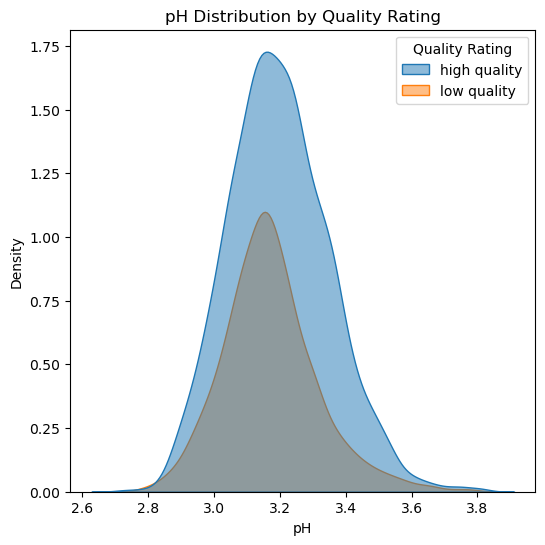

In [382]:
histplot('ph','pH',10)
kdeplot('ph','pH')

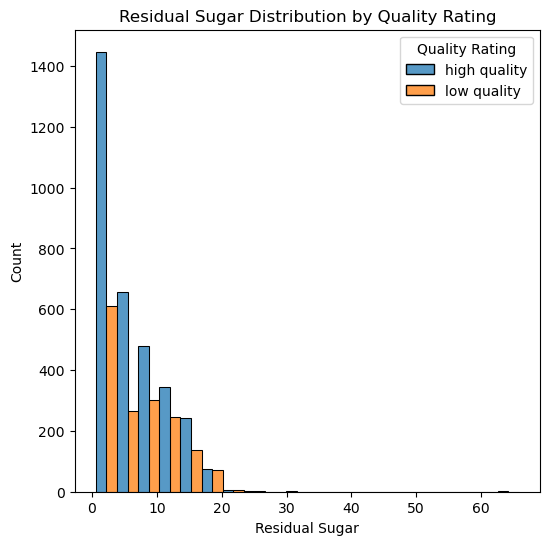

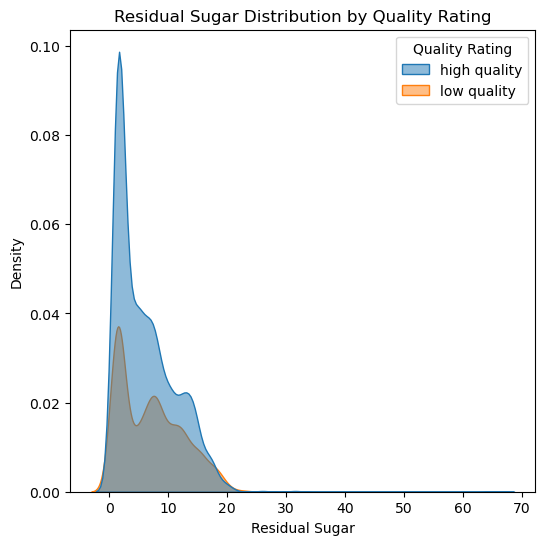

In [384]:
histplot('residual_sugar','Residual Sugar',20)
kdeplot('residual_sugar','Residual Sugar')

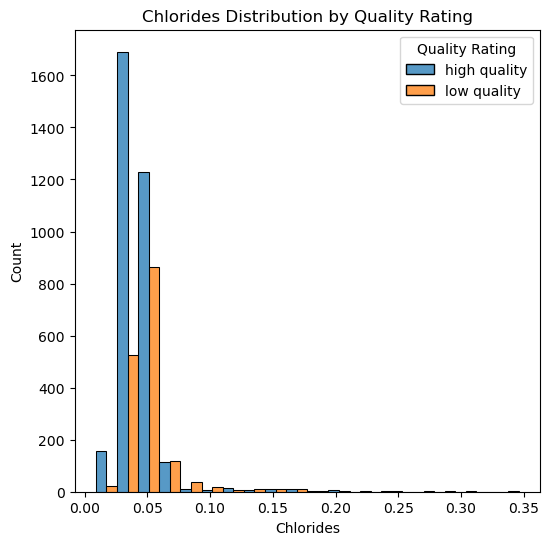

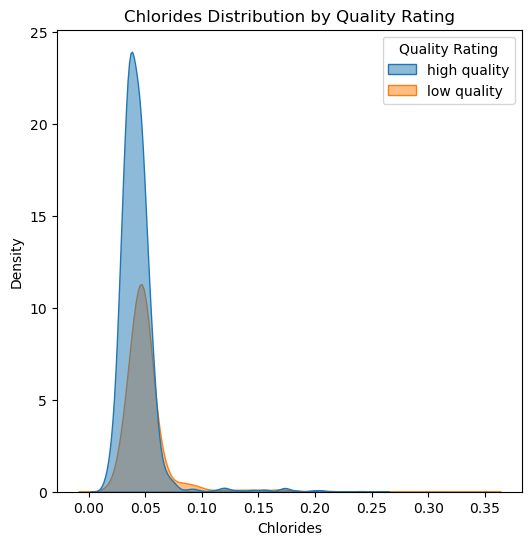

In [386]:
histplot('chlorides','Chlorides',20)
kdeplot('chlorides','Chlorides')

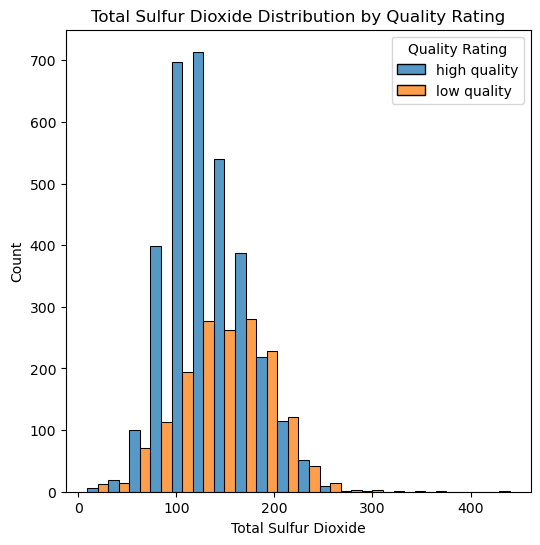

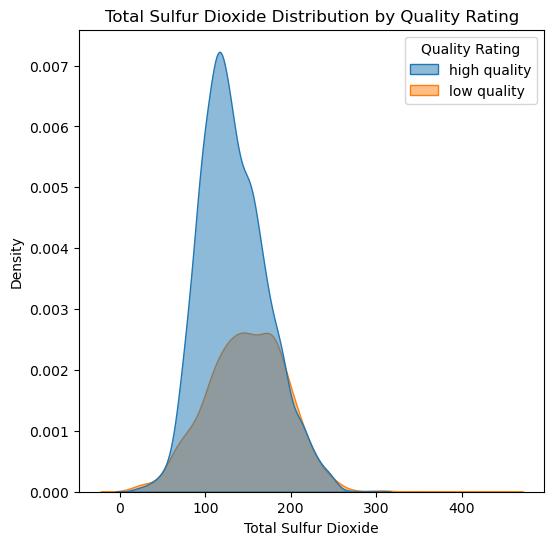

In [388]:
histplot('total_sulfur_dioxide','Total Sulfur Dioxide',20)
kdeplot('total_sulfur_dioxide','Total Sulfur Dioxide')

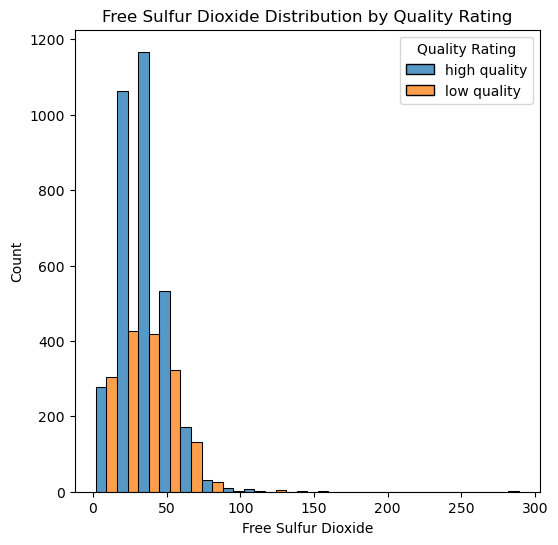

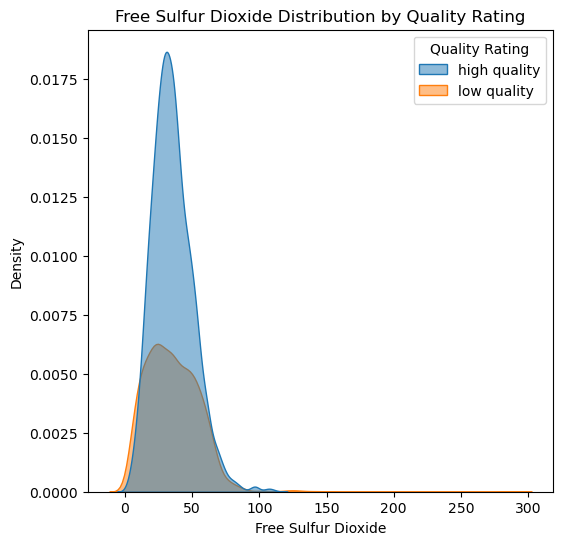

In [390]:
histplot('free_sulfur_dioxide','Free Sulfur Dioxide',20)
kdeplot('free_sulfur_dioxide','Free Sulfur Dioxide')

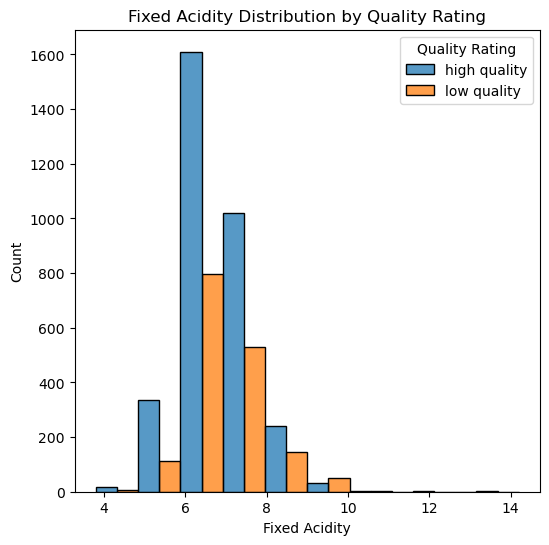

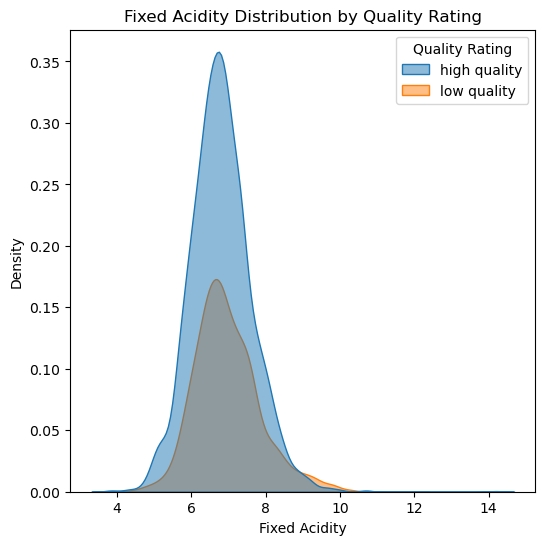

In [392]:
histplot('fixed_acidity','Fixed Acidity',10)
kdeplot('fixed_acidity','Fixed Acidity')